<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
file = open('./sat_scores.csv','r')
sat_raw = file.read().splitlines()
sat_raw

['State,Rate,Verbal,Math',
 'CT,82,509,510',
 'NJ,81,499,513',
 'MA,79,511,515',
 'NY,77,495,505',
 'NH,72,520,516',
 'RI,71,501,499',
 'PA,71,500,499',
 'VT,69,511,506',
 'ME,69,506,500',
 'VA,68,510,501',
 'DE,67,501,499',
 'MD,65,508,510',
 'NC,65,493,499',
 'GA,63,491,489',
 'IN,60,499,501',
 'SC,57,486,488',
 'DC,56,482,474',
 'OR,55,526,526',
 'FL,54,498,499',
 'WA,53,527,527',
 'TX,53,493,499',
 'HI,52,485,515',
 'AK,51,514,510',
 'CA,51,498,517',
 'AZ,34,523,525',
 'NV,33,509,515',
 'CO,31,539,542',
 'OH,26,534,439',
 'MT,23,539,539',
 'WV,18,527,512',
 'ID,17,543,542',
 'TN,13,562,553',
 'NM,13,551,542',
 'IL,12,576,589',
 'KY,12,550,550',
 'WY,11,547,545',
 'MI,11,561,572',
 'MN,9,580,589',
 'KS,9,577,580',
 'AL,9,559,554',
 'NE,8,562,568',
 'OK,8,567,561',
 'MO,8,577,577',
 'LA,7,564,562',
 'WI,6,584,596',
 'AR,6,562,550',
 'UT,5,575,570',
 'IA,5,593,603',
 'SD,4,577,582',
 'ND,4,592,599',
 'MS,4,566,551',
 'All,45,506,514']

In [3]:
#separate header from data
sat_header = sat_raw[0]
sat_data = sat_raw[1:]
print(sat_header)
print(sat_data)

State,Rate,Verbal,Math
['CT,82,509,510', 'NJ,81,499,513', 'MA,79,511,515', 'NY,77,495,505', 'NH,72,520,516', 'RI,71,501,499', 'PA,71,500,499', 'VT,69,511,506', 'ME,69,506,500', 'VA,68,510,501', 'DE,67,501,499', 'MD,65,508,510', 'NC,65,493,499', 'GA,63,491,489', 'IN,60,499,501', 'SC,57,486,488', 'DC,56,482,474', 'OR,55,526,526', 'FL,54,498,499', 'WA,53,527,527', 'TX,53,493,499', 'HI,52,485,515', 'AK,51,514,510', 'CA,51,498,517', 'AZ,34,523,525', 'NV,33,509,515', 'CO,31,539,542', 'OH,26,534,439', 'MT,23,539,539', 'WV,18,527,512', 'ID,17,543,542', 'TN,13,562,553', 'NM,13,551,542', 'IL,12,576,589', 'KY,12,550,550', 'WY,11,547,545', 'MI,11,561,572', 'MN,9,580,589', 'KS,9,577,580', 'AL,9,559,554', 'NE,8,562,568', 'OK,8,567,561', 'MO,8,577,577', 'LA,7,564,562', 'WI,6,584,596', 'AR,6,562,550', 'UT,5,575,570', 'IA,5,593,603', 'SD,4,577,582', 'ND,4,592,599', 'MS,4,566,551', 'All,45,506,514']


In [4]:
#defining the dict
sat_header = sat_header.split(',')
sat_data = [line.split(',') for line in sat_data]

sat_dict = {sat_header[n]:[line[n] for line in sat_data] for n in range(len(sat_header))}
sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
#with dict
df1 = pd.DataFrame(sat_dict)
df1.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
df1.dtypes
#inputting from dictionary gives 'object' dtypes for all values as all values in the dictionary are considered strings.

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [7]:
#with .read_csv
df2 = pd.read_csv('./sat_scores.csv')
df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [8]:
df2.dtypes
#reading the csv file with pandas gives 'int64' dtypes for numerical values.

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
df2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [11]:
#creating a dictionary
df_dict = {
    "Column": [df2.columns[n] for n in range(len(df2.columns))],
    "Type": [df2[df2.columns[n]].dtypes for n in range(len(df2.columns))],
    "Description": ["State codes for each state in the US","Participation rate per state","Mean Score for Verbal per State","Mean Score for Math per State"]
             }
#expressing the dictionary as a DataFrame
ddict = pd.DataFrame(df_dict).set_index("Column")
print("The shape of the dataset is", str(df2.shape)+".")
ddict

                   

The shape of the dataset is (52, 4).


,Type,Description
Column,,
State,object,State codes for each state in the US
Rate,int64,Participation rate per state
Verbal,int64,Mean Score for Verbal per State
Math,int64,Mean Score for Math per State


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


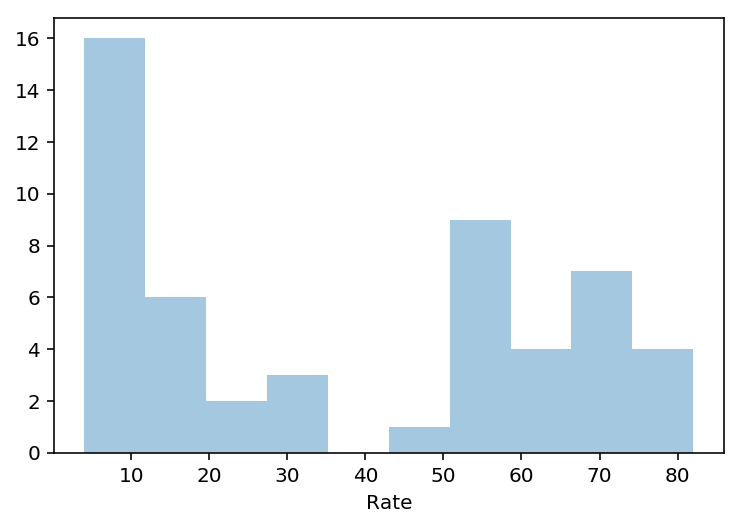

In [12]:
import seaborn as sns
sns.distplot(df2['Rate'], kde=False, bins = 10)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


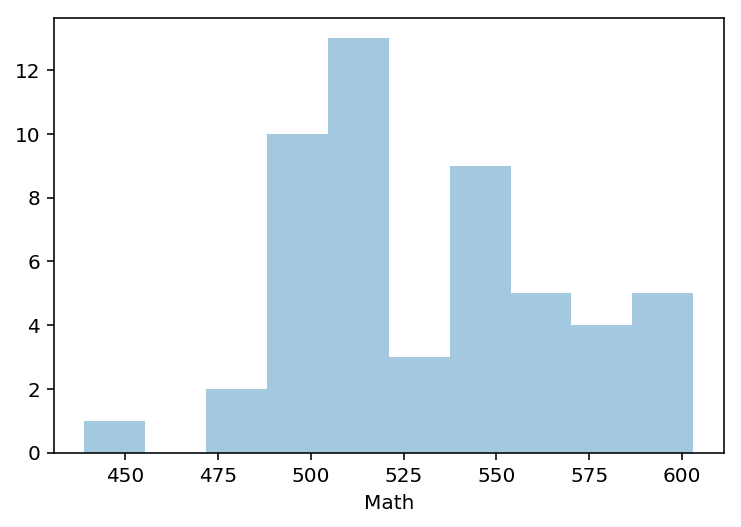

In [13]:
sns.distplot(df2['Math'], kde=False, bins = 10)

C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


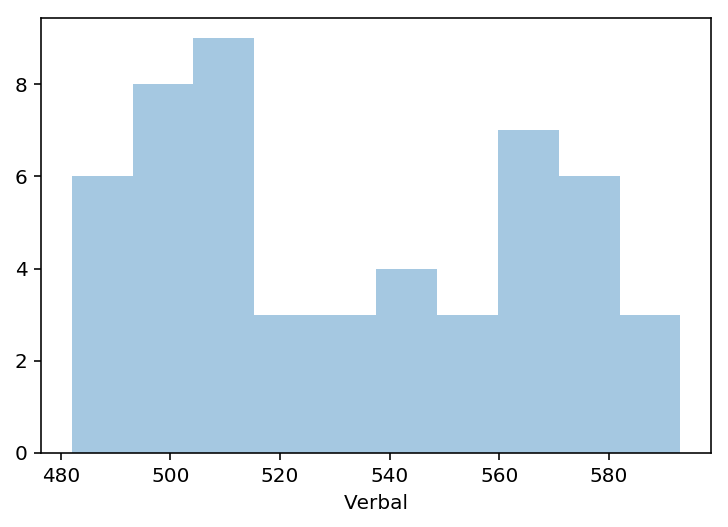

In [14]:
sns.distplot(df2['Verbal'], kde=False, bins = 10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

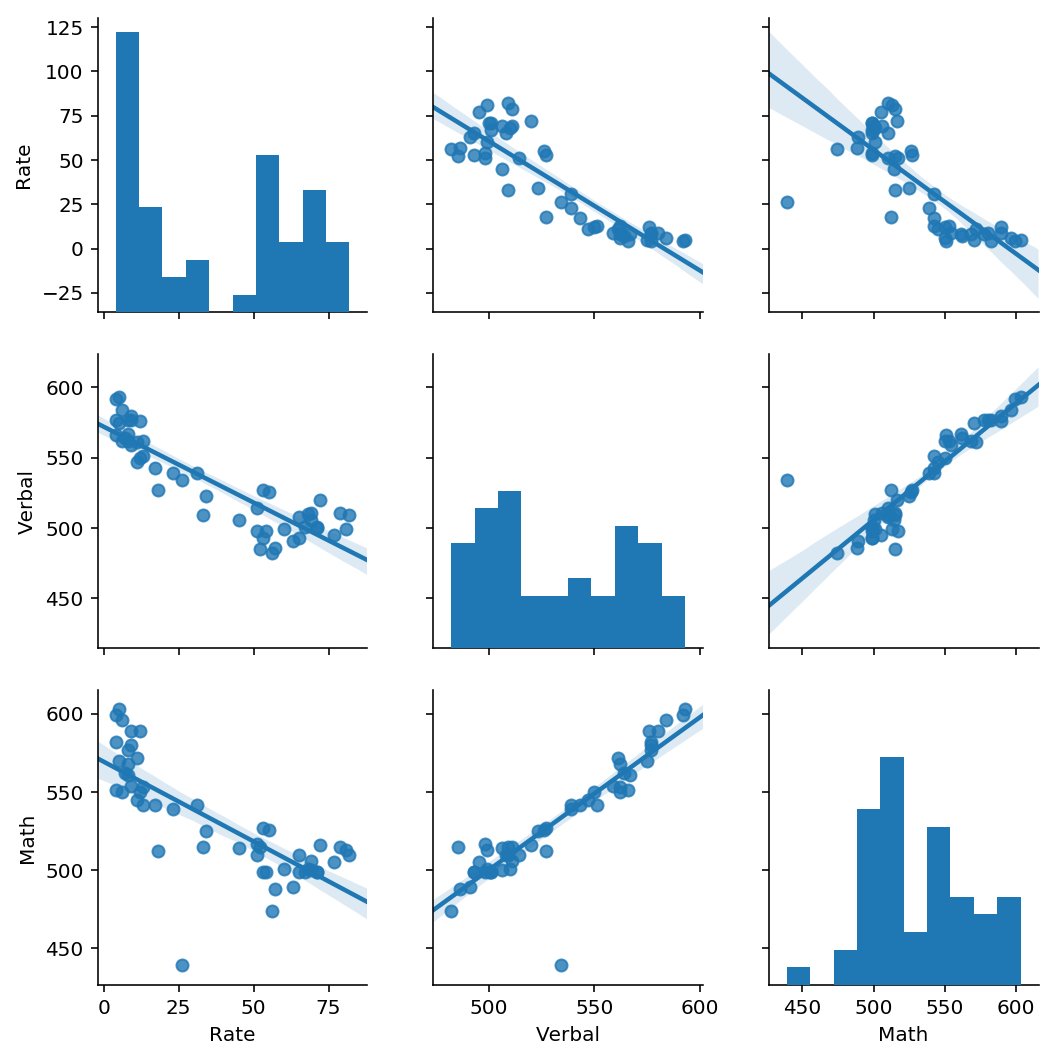

In [15]:
sns.pairplot(df2, kind="reg")

**Comments**
_In general, the higher the participation rate per state, the lower the SAT average scores appear to be. This implies that states with higher participation rates has more lower performing students taking the SAT tests, while the states with lower participation rates limit the participation to higher performing students._

_There's a positive correlation between Verbal and Maths scores, implying that students good in the Verbal portion also tend to be good in Math portion of the SAT test, with the exception of the one outlier that shows one State having much higher Verbal scores compared to Math._


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

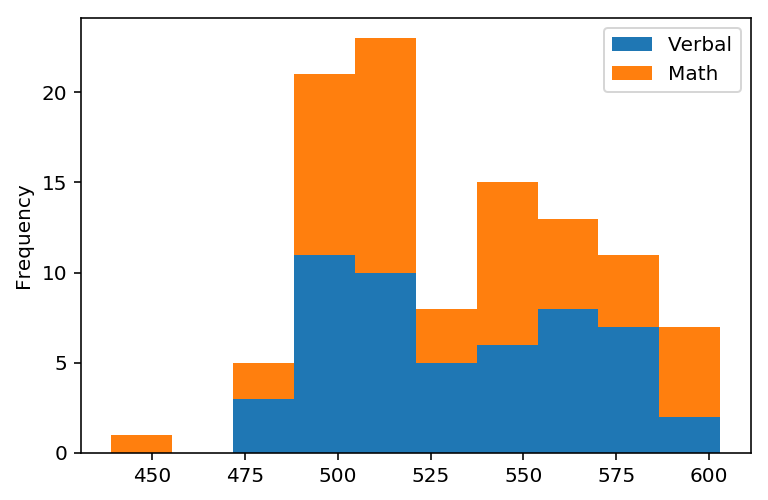

In [16]:
import matplotlib.pyplot as plt
df2[["Verbal","Math"]].plot.hist(stacked = True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

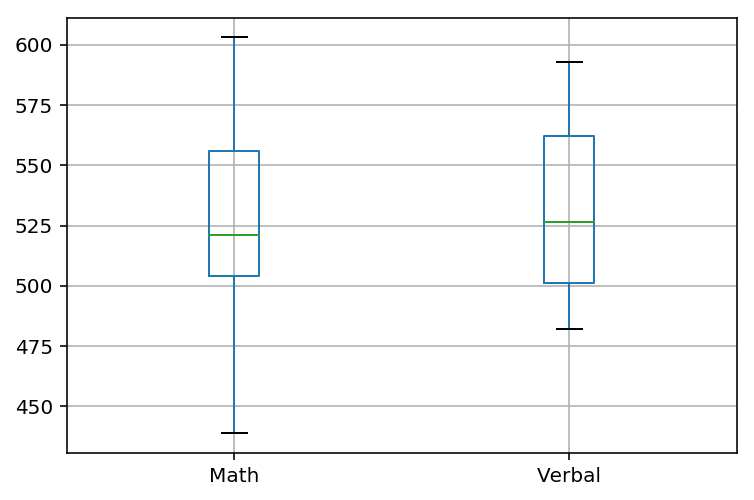

In [17]:
#using pandas
df2[["Math","Verbal"]].boxplot()

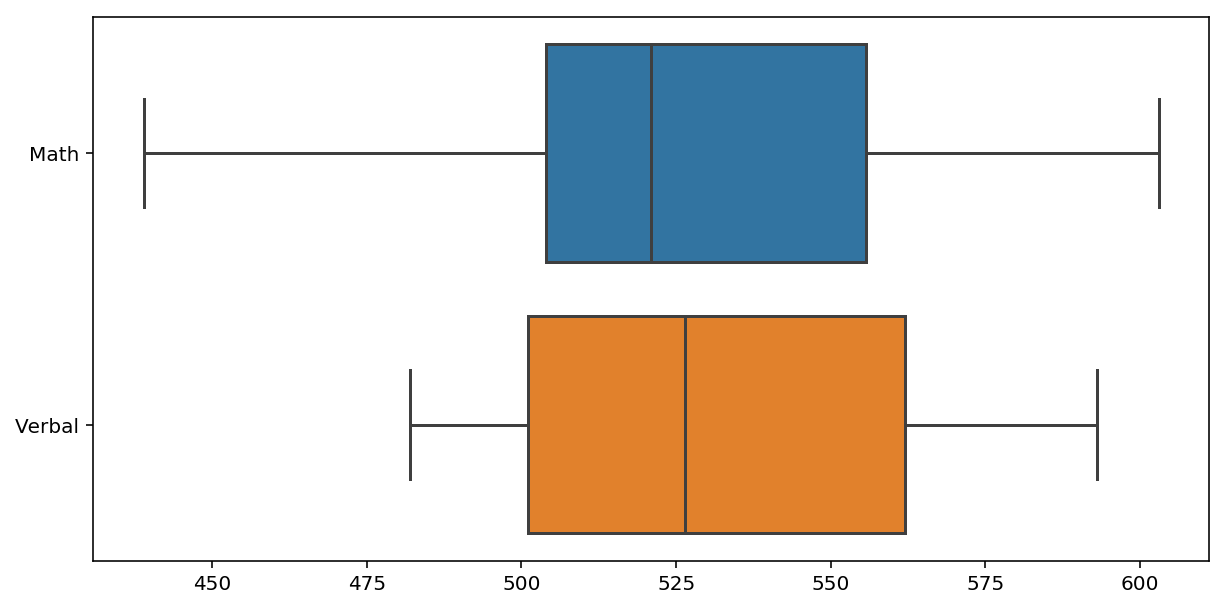

In [18]:
#using seaborn
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

ax = sns.boxplot(data=df2[["Math","Verbal"]], orient="h")
plt.show()

**Comments**  
_'Rate' is scaled completely differently from 'Verbal' and 'Math' columns, as 'Rate' refers to proportion and is always less than 100, while the other 2 columns contains values closer to 500._

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [19]:
#Using standardization
stateless = df2.drop("State", axis=1)
stateless_stand = (stateless - stateless.mean()) / stateless.std()
#standardization forces each distribution to have a mean of 0 and a std of 1, so that they can all be displayed on the same scale.

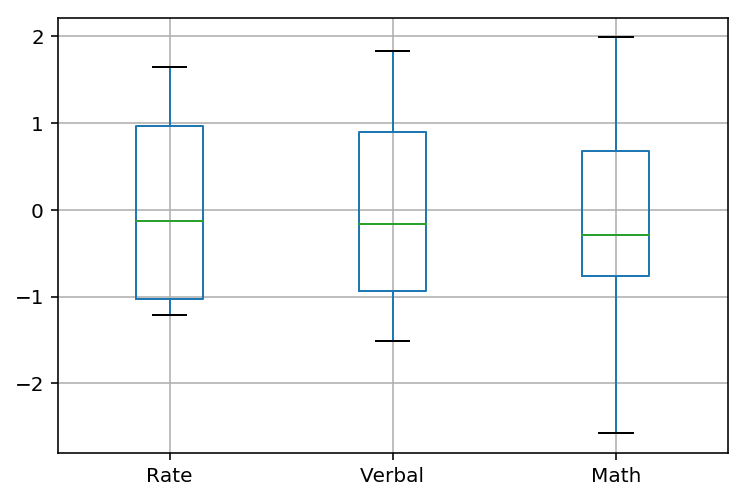

In [20]:
#using pandas
stateless_stand.boxplot()

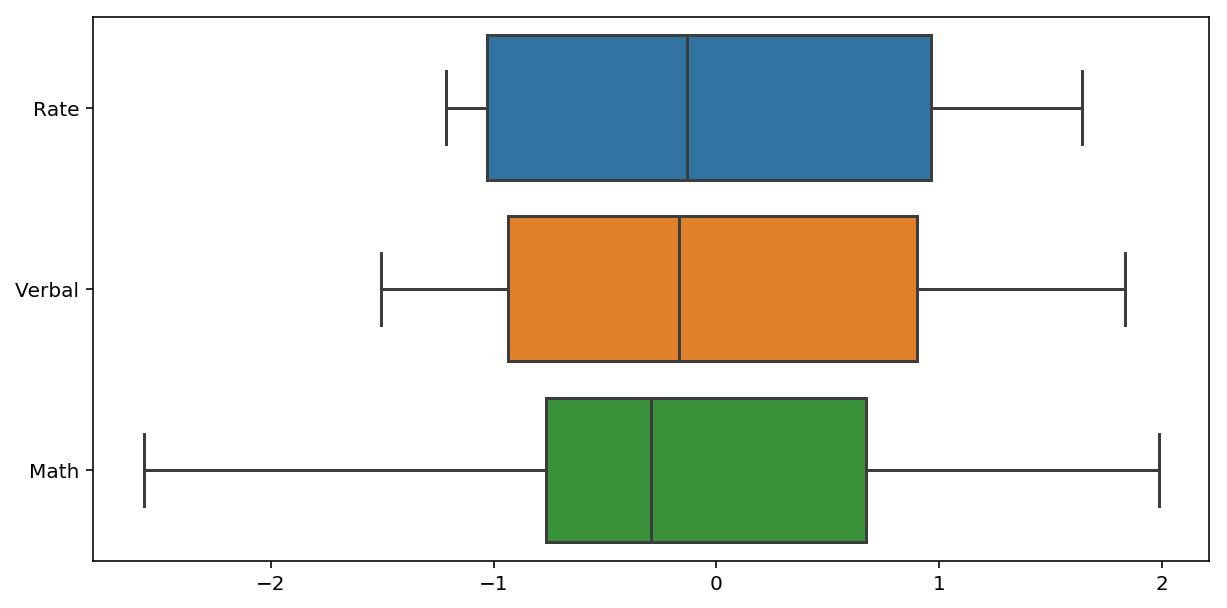

In [21]:
#using seaborn
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

ax = sns.boxplot(data=stateless_stand, orient='h')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
ave_verbal = np.mean(df2["Verbal"])
greater_verbal = df2[["State"]].loc[df2["Verbal"] > ave_verbal]

print(greater_verbal.nunique())
greater_verbal
#24 States have greater Verbal scores than average across the states. There are 52 states in America, so this implies 
#the Verbal score distribution is roughly symmetrical, as roughly half the states are higher than average.

State    24
dtype: int64


,State
26,CO
27,OH
28,MT
30,ID
31,TN
32,NM
33,IL
34,KY
35,WY
36,MI


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
med_verbal = np.median(df2["Verbal"])
greater_med_verbal = df2[["State"]].loc[df2["Verbal"] > med_verbal]

print(greater_med_verbal.nunique())
greater_med_verbal
#26 States have greater Verbal scores than median across the states. This implies the median is slightly lower than average,
#hence more states are able to fit in this criteria. The distribution is slightly skewed to the right.

State    26
dtype: int64


,State
19,WA
26,CO
27,OH
28,MT
29,WV
30,ID
31,TN
32,NM
33,IL
34,KY


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
df4 = df2.copy()
df4["Verbal-Math"] = df4["Verbal"]-df4["Math"]
df4.head()

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
#1. Top 10 states with greatest gap between Verbal and Math scores where Verbal is greater than Math.
top_diff = df4.sort_values("Verbal-Math", ascending=False).head(10)
top_diff

,State,Rate,Verbal,Math,Verbal-Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [26]:
#2. Top 10 states with greatest gap between Verbal and Math scores where Math is greater than Verbal.
bot_diff = df4.sort_values("Verbal-Math").head(10)
bot_diff

,State,Rate,Verbal,Math,Verbal-Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [27]:
#3 Print the header of both variables, showing the top 3 states in each.
print(top_diff.head(3))
print(bot_diff.head(3))

   State  Rate  Verbal  Math  Verbal-Math
27    OH    26     534   439           95
50    MS     4     566   551           15
29    WV    18     527   512           15
   State  Rate  Verbal  Math  Verbal-Math
21    HI    52     485   515          -30
23    CA    51     498   517          -19
1     NJ    81     499   513          -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [28]:
df5=df2.drop("State", axis=1)
df5.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


**Comments**
_Participation rate has a pretty high negative correlation with both Verbal and Math scores, confirming the earlier observation that higher participation rates tend to correspond with lower SAT scores._
_There's also a high correlation between Verbal and Math scores, confirming the earlier observation that students good in the Verbal portion also tend to be good in Math portion of the SAT test._

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
df2.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


**Comments:**  
_count: Returns the number of values for each column name. Since there are no NaN values in the dataset, the count returns 52 (number of rows) for all the columns._  
_mean: Returns the mean value for each column._  
_std: Returns the standard deviation for each column._  
_min: Returns the smallest value for each column._  
_25%: Returns the value of the 25th percentile in each column._  
_50%: Returns the median value in each column._  
_75%: Returns the 75th percentile in each column._  
_max: Returns the largest value for each column._


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
df5.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


**Comments**  
_1. Covariance matrix shows the covariance, which measures how two variables change together. It can take any value. The correlation matrix measure the strength and direction of the linear relationship between two variables. It will take a value between -1 to 1._  
_2. $\text{Cor}_{XY}=\dfrac{\text{Cov}_{XY}}{\sigma_X\sigma_Y}$ where $\sigma_X$ and $\sigma_Y$ are the standard deviations of the variables X and Y respectively._  
_3. Correlation is unaffected by changes in location and scale. It is also standardized, making it easier to compare between 2 different pairs of values._ 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [128]:
drug_data = pd.read_csv("./drug-use-by-age.csv")
drug_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [129]:
drug_data.info()
#There are no null values. However some data points are filled with a "-". There are also values of 0.0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [130]:
#replacing "-" with 0.0 values as these are frequency values that correspond with 0.0 usage rates per drug.
drug_data.replace("-", 0.0, inplace=True)

#converting the valid numbers to float.
drug_data = drug_data.astype({"cocaine-frequency": float, "crack-frequency":float,"heroin-frequency":float,"inhalant-frequency":float,"oxycontin-frequency":float,"meth-frequency":float})
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [110]:
drug_data

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [111]:
drug_data.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


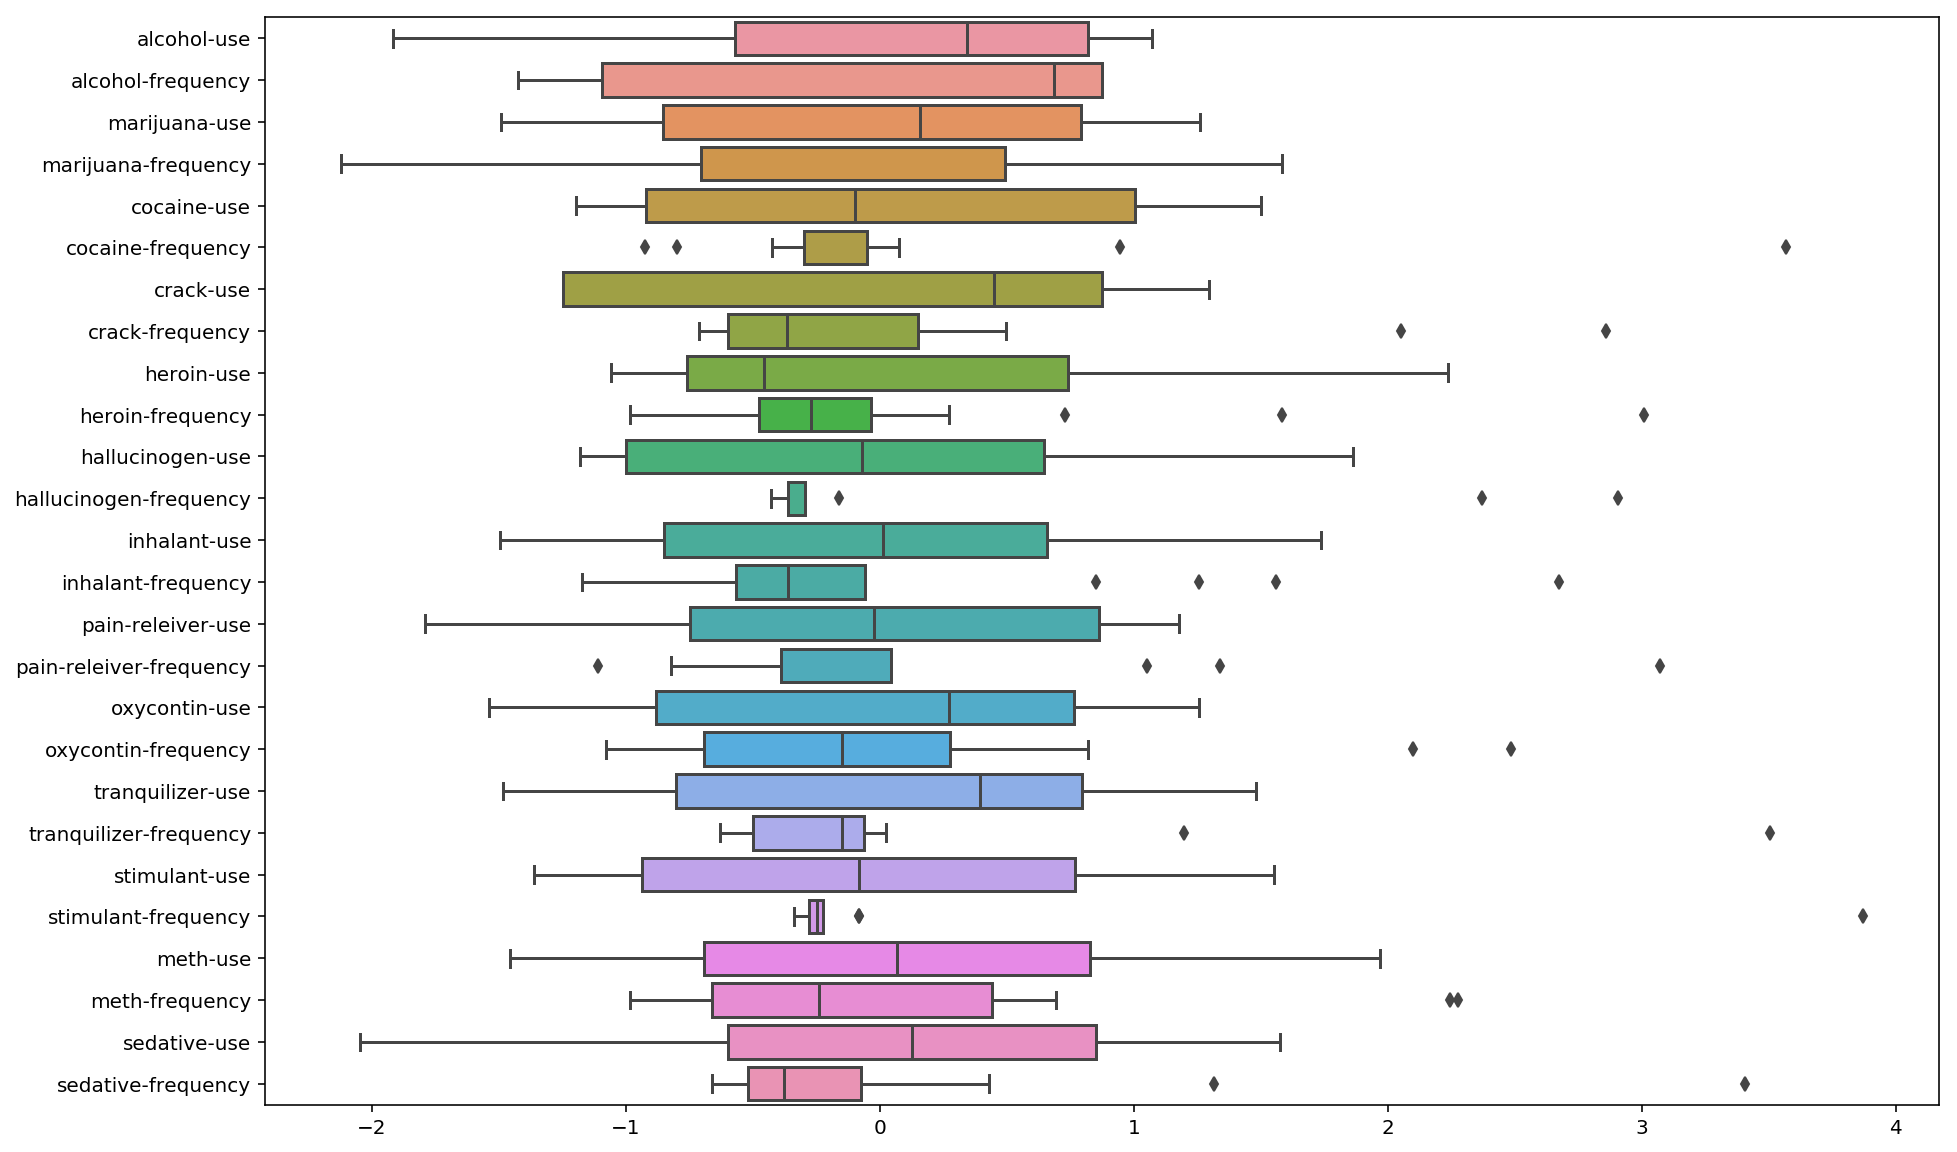

In [112]:
#Standardising the data for box plot
drug_stand = (drug_data.drop(["n","age"],axis=1) - drug_data.drop(["n","age"],axis=1).mean()) / drug_data.drop(["n","age"],axis=1).std()
fig = plt.figure(figsize=(15,10))
sns.boxplot(data=drug_stand, orient="h")
#appears to have lots of outliers for the frequency data.

In [113]:
#splitting the dataset into smaller more manageable datasets
age_index = drug_data[["age"]]
usage = drug_data.iloc[:,[2,4,6,8,10,12,14,16,18,20,22,24,26]]
freq = drug_data.iloc[:,[3,5,7,9,11,13,15,17,19,21,23,25,27]]
age_index

,age
0,12
1,13
2,14
3,15
4,16
5,17
6,18
7,19
8,20
9,21


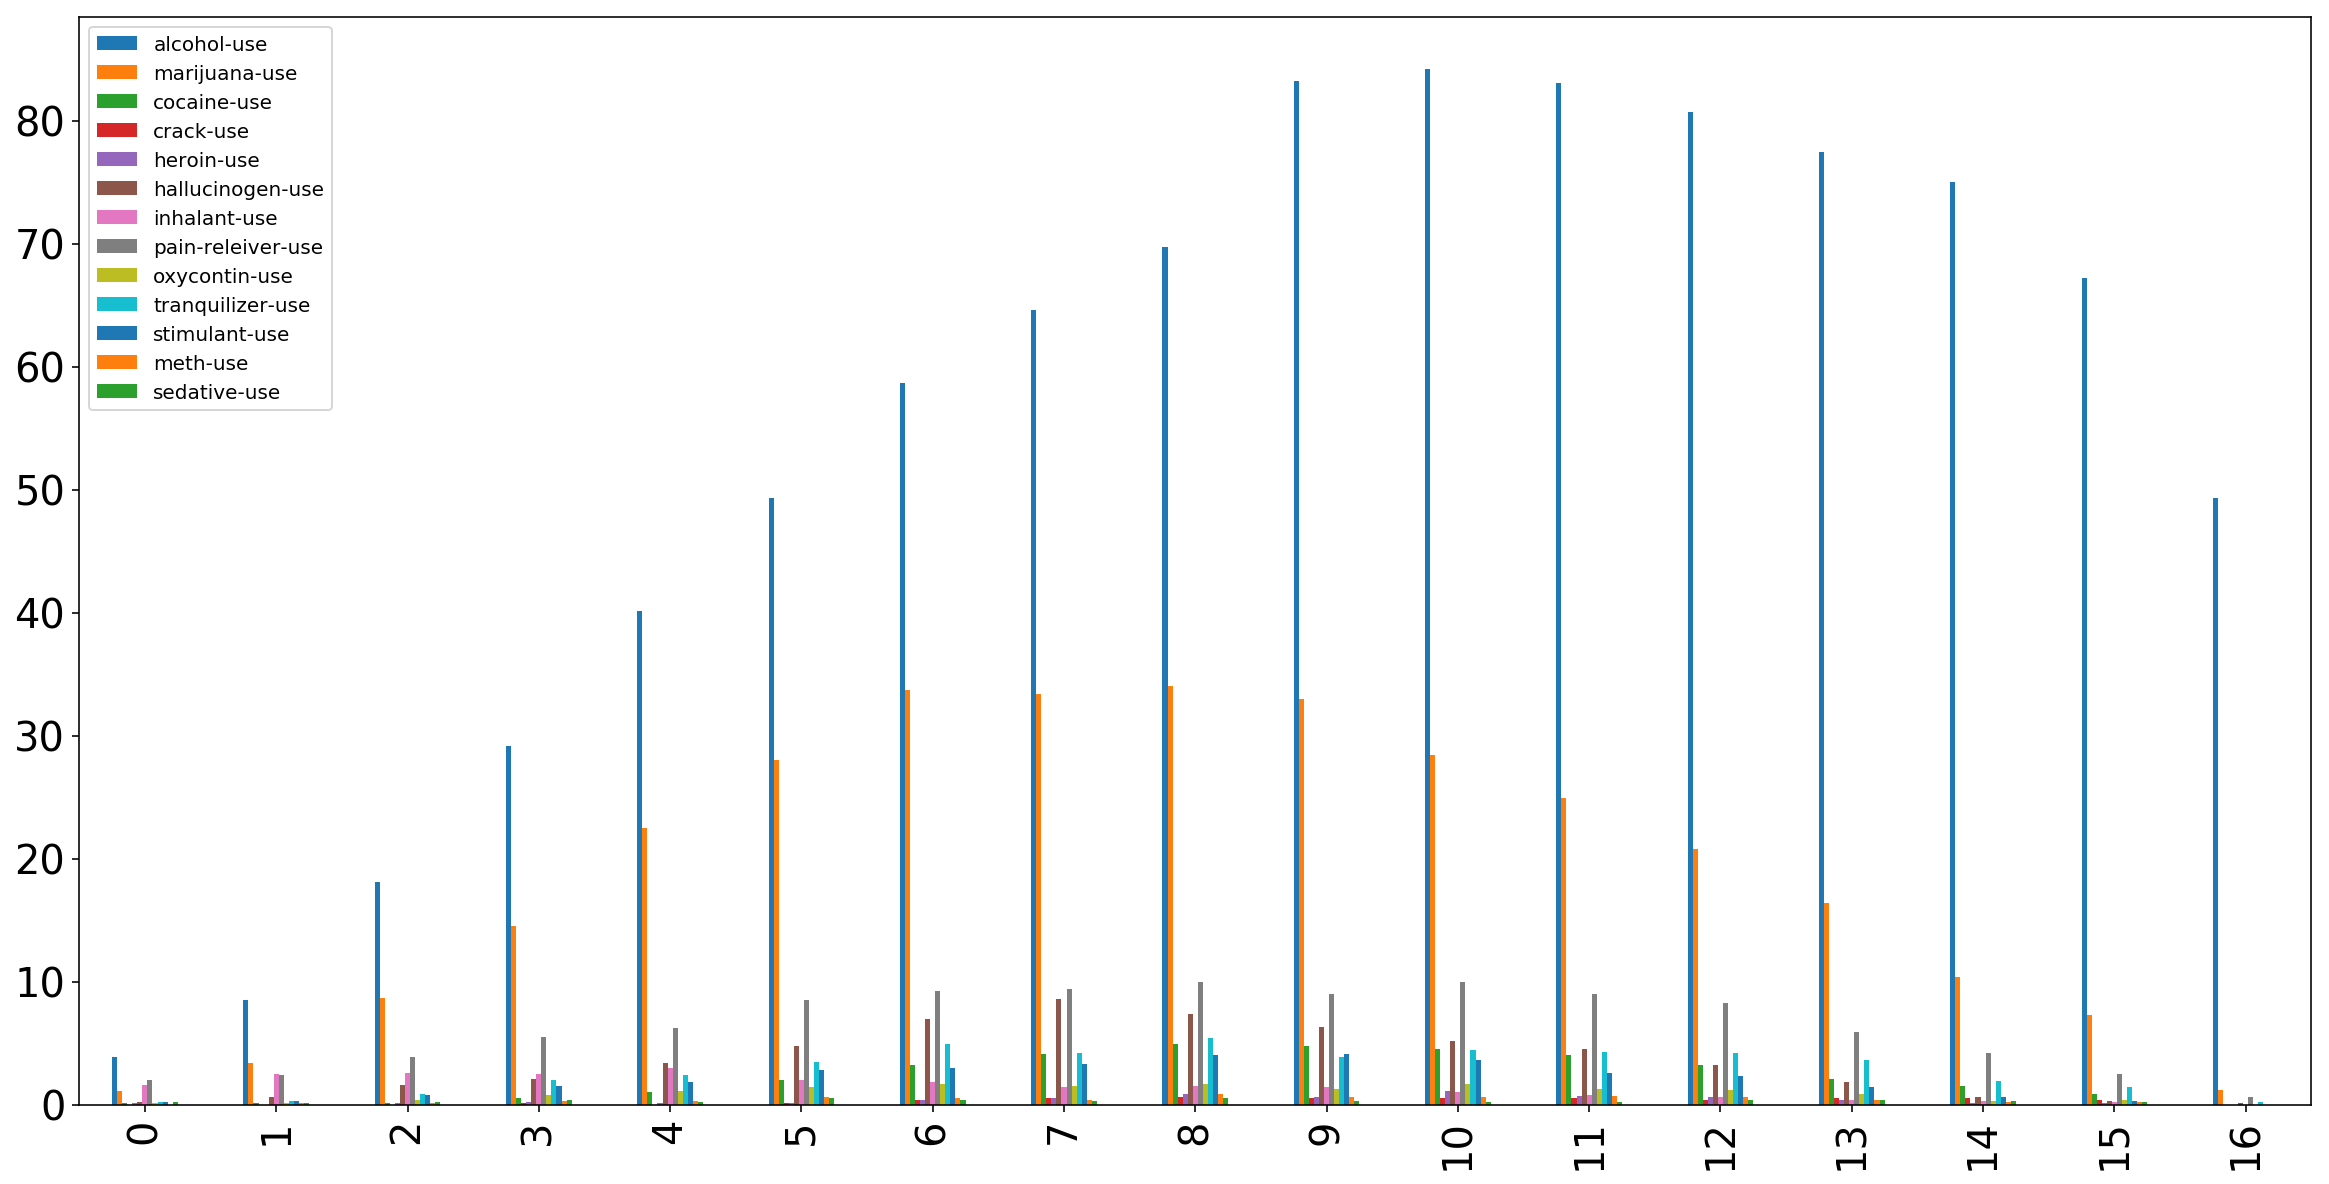

In [114]:
fig, ax = plt.subplots(figsize = (20,10))
usage.plot(kind='bar', ax=ax, fontsize = 20)
#Alcohol-use dominates a large proportion of the respective sample sizes for each age group, followed by marijuana-use and then pain-reliever-use.

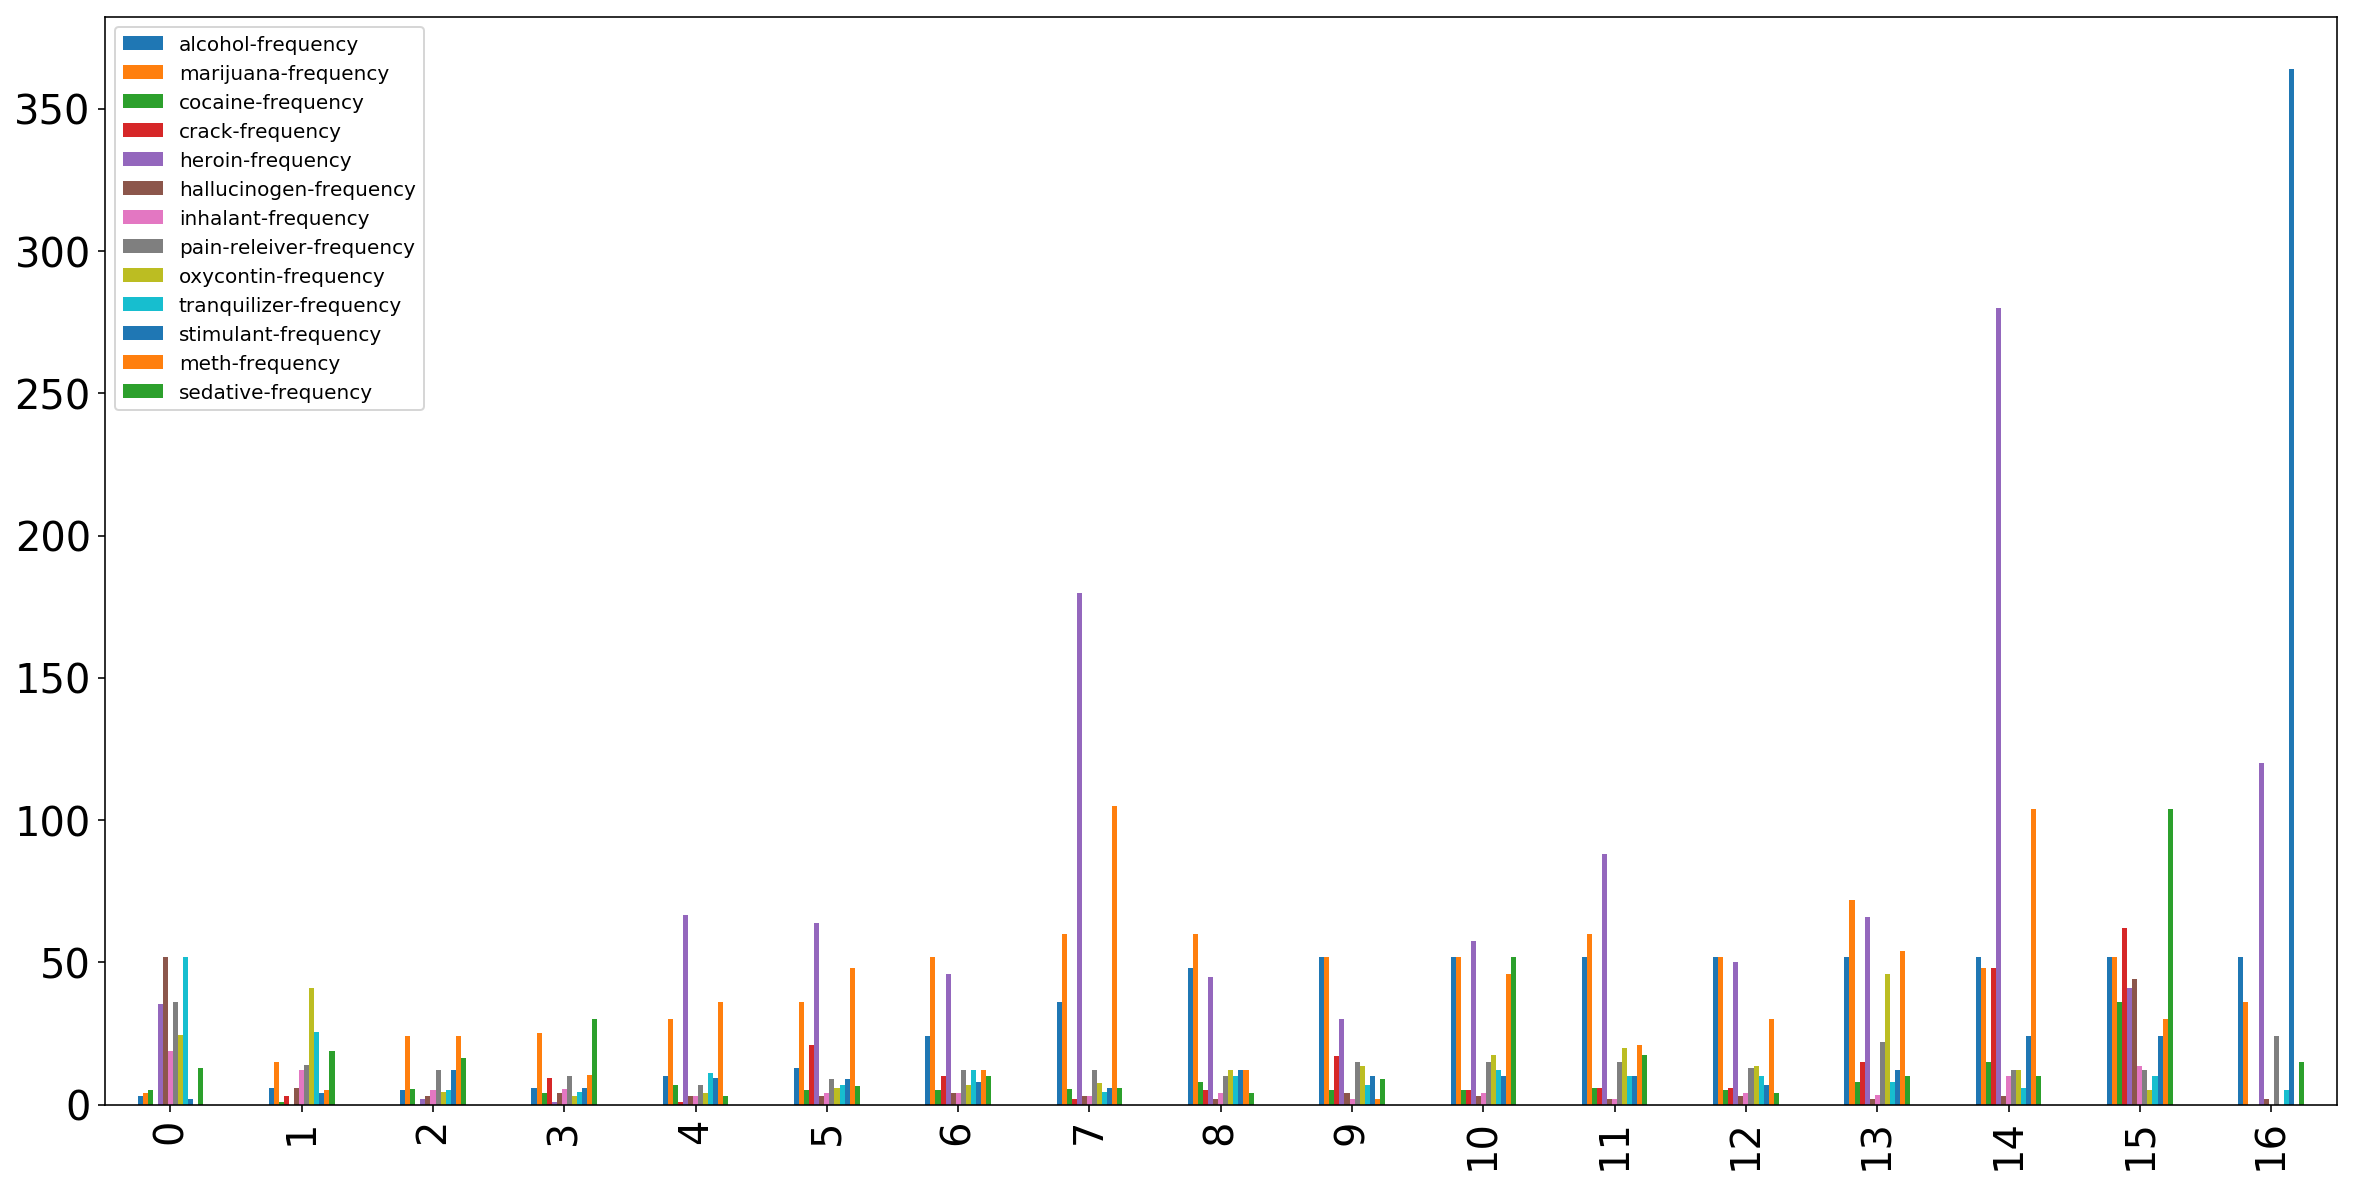

In [115]:
fig, ax = plt.subplots(figsize = (20,10))
freq.plot(kind='bar', ax=ax,fontsize = 20)

**Comments**  
What can be inferred from this dataset: _The most popular drug consumed across all age groups appears to be alcohol, followed by marijuana and pain relievers. Drug use tend to increase with age during the teenage years, after which it tends to plateau and eventually subside. The drug frequency data has a lot extreme outliers, which implies the samples of the various age group may not be drawn from the same population. Special attention to the one data point for age group of 65+, where the median stimulant user appears to take stimulants 364 times a year, while no equivalent behaviour is seen in the 50-64 age group._

##### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...  
**Question:** Does higher usage rate correspond with higher frequency of drug use?  
  
**Deliverables:** Find the correlation between usage rate and frequency.

In [116]:
# Code
#Making the 'usage' and 'freq' dataset to have identical headers
usage.columns = ['alcohol','marijuana','cocaine','crack','heroin','hallucinogen','inhalant','pain-reliever','oxycontin','tranquilizer','stimulant','meth','sedative']
freq.columns = ['alcohol','marijuana','cocaine','crack','heroin','hallucinogen','inhalant','pain-reliever','oxycontin','tranquilizer','stimulant','meth','sedative']

In [117]:
#Finding the correlation list
corr_list = []
for drug in usage:
    corr_list.append(np.corrcoef(usage[drug],freq[drug])[0][1])
corr_list

[0.8978892938239398,
 0.6156102019478248,
 -0.07784815495891301,
 0.33344028544210763,
 -0.044239493258069834,
 -0.42786265287156106,
 0.03697940782595195,
 -0.46861747477663,
 -0.14387708969816887,
 -0.3889538477931679,
 -0.3633576178135257,
 0.05960454457438657,
 -0.28423410921529524]

In [127]:
#Appending the drug header to the list in a new dataframe.
corr_df = pd.DataFrame([['alcohol','marijuana','cocaine','crack','heroin','hallucinogen','inhalant','pain-reliever','oxycontin','tranquilizer','stimulant','meth','sedative'],corr_list])
corr_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-reliever,oxycontin,tranquilizer,stimulant,meth,sedative
1,0.897889,0.61561,-0.0778482,0.33344,-0.0442395,-0.427863,0.0369794,-0.468617,-0.143877,-0.388954,-0.363358,0.0596045,-0.284234


**Report**



...  
_Alcohol has the strongest correlation between usage rates and frequency across all age groups, followed by marijuana. This implies that for these 2 drugs, peer pressure could be a factor, i.e. the more people of your age group that drinks alcohol/smoke marijuana, the frequently you will drink/smoke marijuana._
_For other drugs, the correlation is much weaker, and for many of them even negative. The strongest negative correlation is for pain-relievers, where the opposite effect is observed: the more people of a similar age group takes pain-relievers, the less frequently each user takes pain-relievers. It's worth noting that the correlation is only -0.468617, which, while still the strongest negative correlation, is not very strong at all, so this effect is not as obvious as the earlier observation for alcohol.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Rate    37.153846
dtype: float64
33.5
Rate    27.037996
dtype: float64
9.0
63.5
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDF1525DD8>]]


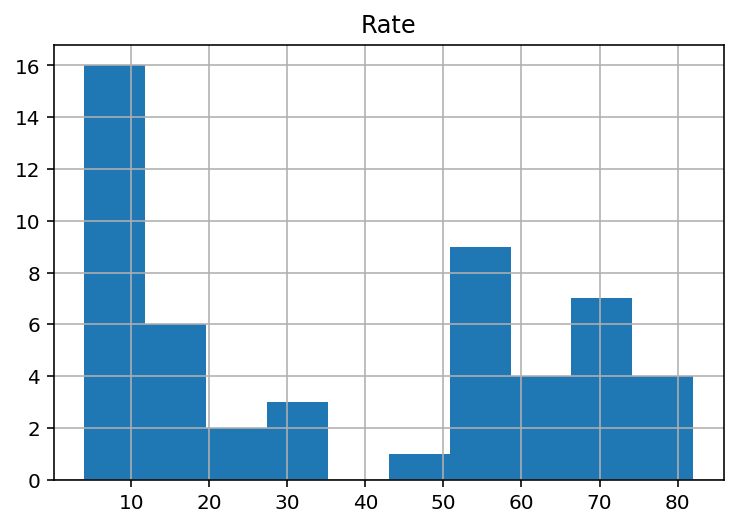

In [49]:
rate = df2[["Rate"]]
print(np.mean(rate))
print(np.median(rate))
print(np.std(rate))
print(np.percentile(rate, 25))
print(np.percentile(rate, 75))
print(rate.hist())
#There doesn't appear to be any outliers in this dataset.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [41]:
ranked = stateless.drop(["Rate"], axis=1)

#Adding the rankings for Verbal
ranked = ranked.sort_values(by="Verbal").reset_index(drop=True)
ranked["V Rank"]=range(1,53)

#Adding the rankings for Math
ranked = ranked.sort_values(by="Math").reset_index(drop=True)
ranked["M Rank"]=range(1,53)

ranked

,Verbal,Math,V Rank,M Rank
0,534,439,29,1
1,482,474,1,2
2,486,488,3,3
3,491,489,4,4
4,501,499,13,5
5,500,499,12,6
6,498,499,9,7
7,501,499,14,8
8,493,499,6,9
9,493,499,5,10


In [42]:
#The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables.
ranked[["V Rank", "M Rank"]].corr()

,V Rank,M Rank
V Rank,1.000000,0.900965
M Rank,0.900965,1.000000


**Comments**  
_1. Spearman correlation gave a very similar value as the Pearson correlation, spearman giving 0.900965 and pearson giving 0.899871. Both implies a high correlation between Verbal and Math scores._  
_2. Sort the 2 variables and assign ranking for them. Since Spearman correlation is the Pearson correlation of the ranked variables, simply apply Pearson correlation to the rankings._

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [43]:
#1
rate["Percentile"] = [stats.percentileofscore(rate,x) for x in rate["Rate"]]
rate.head()

C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rate,Percentile
0,82,100.000000
1,81,98.076923
2,79,96.153846
3,77,94.230769
4,72,92.307692


In [44]:
#2 
#Adding state column
rate = rate.join(df2["State"])
#showing percentile in California
rate.loc[rate["State"] == "CA"]

,Rate,Percentile,State
23,51,56.730769,CA


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

#1. _Percentile scoring disregards the magnitude of the distance of the outlier, assigning it a rank relative to the other data points instead. This makes it easier to reconcile with the rest of the dataset and is useful for cases where the absolute values matter less than their position relative to other values, such as when grading college students._

In [45]:
#2. Variable of my choice: alcohol-use
alcohol = drug_data[["alcohol-use"]]
alcohol.head()

,alcohol-use
0,3.9
1,8.5
2,18.1
3,29.2
4,40.1


C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


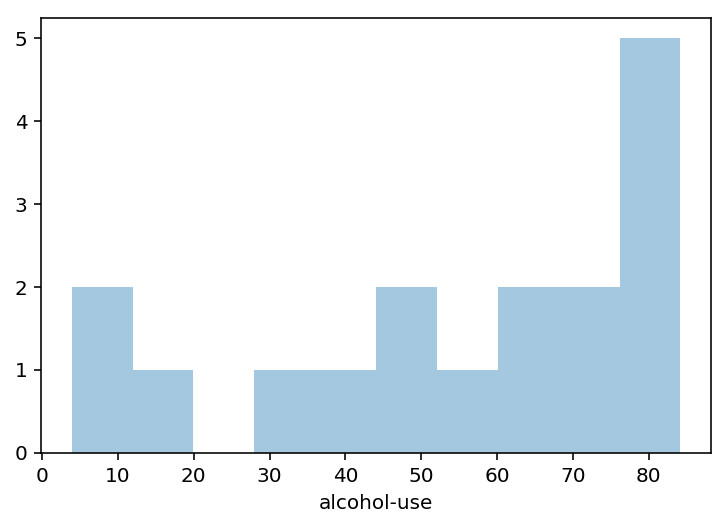

In [46]:
sns.distplot(alcohol["alcohol-use"], bins=10, kde=False)

In [47]:
#3 with percentile scored.
alcohol["Percentile"] = [stats.percentileofscore(alcohol,x) for x in alcohol["alcohol-use"]]

C:\Users\yitaris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\yitaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


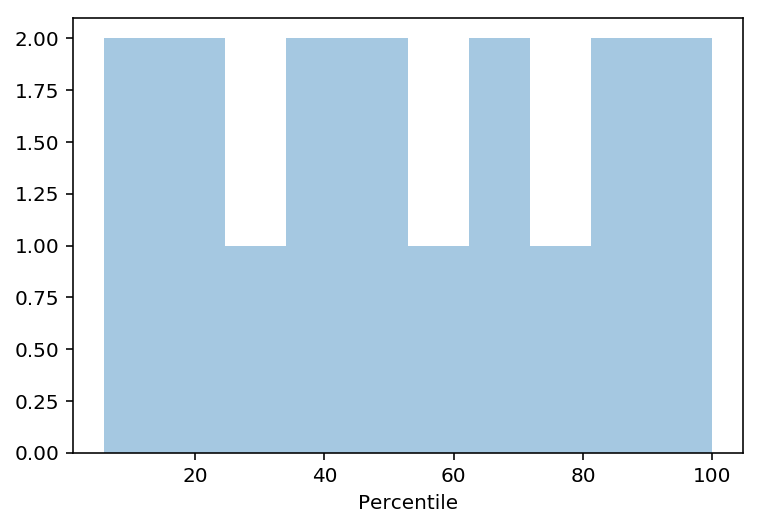

In [48]:
sns.distplot(alcohol["Percentile"], bins=10, kde=False)

**Comments**  
#4. _Visually, the distribution becomes flatter and more symmetrical._